In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Reading in Cleaned csv's
df = pd.read_csv('./datasets/cleaned_train.csv')
test = pd.read_csv('./datasets/cleaned_test.csv')

In [3]:
# Correcting for missing columns in either
for i in list(df.columns ^ test.columns):
    if i in list(df.columns):
        test[i] = 0
    else:
        df[i] = 0

df.shape, test.shape

((2051, 315), (879, 315))

### Prepping features and scaling

In [4]:
numerical_columns = df._get_numeric_data().columns
features = [col for col in numerical_columns if col != 'SalePrice']

# initial split of X and y
X = df[features]
y = df['SalePrice']

# instantiate PolynomialFeatures object
pf = PolynomialFeatures(degree = 2,
                       interaction_only=True,
                       include_bias=False)

# transform X to have polynomial features
pf = pf.fit(X)

# this has the new features:
X_overfit = pf.transform(X)

# standard features:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=42)

# overfit features:
X_overfit_train, X_overfit_test, y_overfit_train, y_overfit_test = train_test_split(X_overfit, y,
                                                   random_state=42)

# instantiate StandardScaler for original features:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

# instantiate StandardScaler for overfit features:
ss_overfit = StandardScaler()
ss_overfit.fit(X_overfit_train)
X_overfit_train_sc = ss_overfit.transform(X_overfit_train)
X_overfit_test_sc = ss_overfit.transform(X_overfit_test)

C:\Users\Mason\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mason\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Mason\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [6]:
X_overfit_train_sc.shape

(1538, 49455)

In [5]:
lr = LinearRegression()
lr_overfit = LinearRegression()

lasso = LassoCV(max_iter=10000)
lasso_overfit = LassoCV(max_iter=10000)

r_alphas = np.logspace(0, 5, 200)
ridge = RidgeCV(alphas=r_alphas)
ridge_overfit = RidgeCV(alphas=r_alphas)

### LR Tests

lr cross_val_score -3.5735619159244262e+25
lr train r2 = 0.9451666151617949
lr test r2 = -5.796449323984959e+23


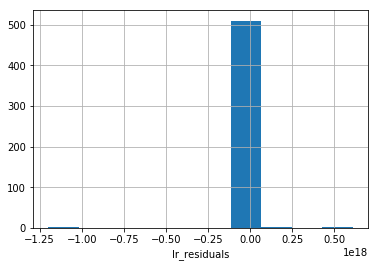

In [6]:
print("lr cross_val_score", cross_val_score(lr, X_train_sc, y_train, cv=3).mean())

lr.fit(X_train_sc, y_train)

print('lr train r2 =', lr.score(X_train_sc, y_train))

print('lr test r2 =', lr.score(X_test_sc, y_test))

lr_preds = lr.predict(X_test_sc)

lr_residuals = y_test - lr_preds

lr_residuals.hist()
plt.xlabel('lr_residuals');

lr_overfit cross_val_score 0.7543450293116626
lr_overfit train r2 = 1.0
lr_overfit test r2 = -40706093.56544397


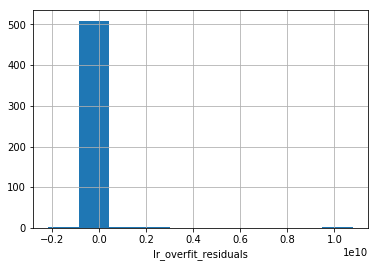

In [7]:
print("lr_overfit cross_val_score", cross_val_score(lr_overfit, X_overfit_train_sc, y_overfit_train, cv=3).mean())

lr_overfit.fit(X_overfit_train_sc, y_overfit_train)

print('lr_overfit train r2 =', lr_overfit.score(X_overfit_train_sc, y_overfit_train))

print('lr_overfit test r2 =', lr_overfit.score(X_overfit_test_sc, y_overfit_test))

lr_overfit_preds = lr_overfit.predict(X_overfit_test_sc)

lr_overfit_residuals = y_overfit_test - lr_overfit_preds

lr_overfit_residuals.hist()
plt.xlabel('lr_overfit_residuals');

### Lasso Tests

lasso cross_val_score 0.8406890914196472
lasso train r2 = 0.9303312157048212
lasso test r2 = 0.9257564048338922


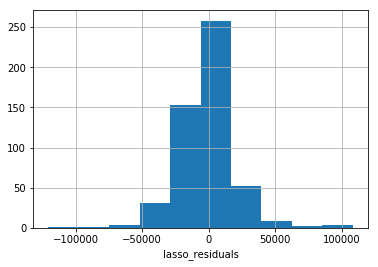

In [8]:
print("lasso cross_val_score", cross_val_score(lasso, X_train_sc, y_train, cv=3).mean())

lasso.fit(X_train_sc, y_train)

print('lasso train r2 =', lasso.score(X_train_sc, y_train))

print('lasso test r2 =', lasso.score(X_test_sc, y_test))

lasso_preds = lasso.predict(X_test_sc)

lasso_residuals = y_test - lasso_preds

lasso_residuals.hist()
plt.xlabel('lasso_residuals');

lasso_overfit cross_val_score [0.91809768 0.92862159 0.57320952]
lasso_overfit train r2 = 0.9678658061176897
lasso_overfit test r2 = 0.9220848321862186


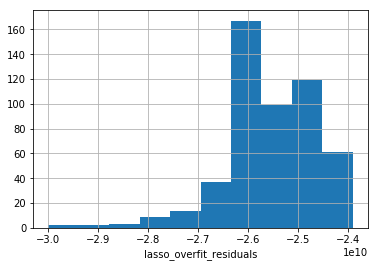

In [9]:
# Showing  cross val score
print("lasso_overfit cross_val_score", cross_val_score(lasso_overfit,
                                                       X_overfit_train_sc,
                                                       y_overfit_train,
                                                       cv=3)).mean()
# Fitting to overfit data
lasso_overfit.fit(X_overfit_train_sc, y_overfit_train)

print('lasso_overfit train r2 =', lasso_overfit.score(X_overfit_train_sc,
                                                      y_overfit_train))

print('lasso_overfit test r2 =', lasso_overfit.score(X_overfit_test_sc,
                                                     y_overfit_test))

lasso_overfit_preds = lasso_overfit.predict(X_overfit_test)

lasso_overfit_residuals = y_overfit_test - lasso_overfit_preds

lasso_overfit_residuals.hist()
plt.xlabel('lasso_overfit_residuals');

In [10]:
lasso_overfit.alpha_

933.6587504921476

### Ridge Tests

ridge cross_val_score 0.8351325832845499
ridge train r2 = 0.9234486471871618
ridge test r2 = 0.9070065237946


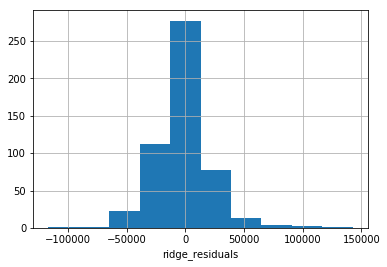

In [11]:
print("ridge cross_val_score", cross_val_score(ridge, X_train_sc, y_train, cv=3).mean())

ridge.fit(X_train_sc, y_train)

print('ridge train r2 =', ridge.score(X_train_sc, y_train))

print('ridge test r2 =', ridge.score(X_test_sc, y_test))

ridge_preds = ridge.predict(X_test_sc)

ridge_residuals = y_test - ridge_preds

ridge_residuals.hist()
plt.xlabel('ridge_residuals');

ridge_overfit cross_val_score 0.817750929244217
ridge_overfit train r2 = 0.9548644726309895
ridge_overfit test r2 = 0.9145827638745812


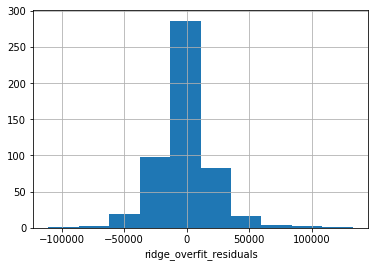

In [12]:
print("ridge_overfit cross_val_score", cross_val_score(ridge_overfit, X_overfit_train_sc, y_overfit_train, cv=3).mean())

ridge_overfit.fit(X_overfit_train_sc, y_overfit_train)

print('ridge_overfit train r2 =', ridge_overfit.score(X_overfit_train_sc, y_overfit_train))

print('ridge_overfit test r2 =', ridge_overfit.score(X_overfit_test_sc, y_overfit_test))

ridge_overfit_preds = ridge_overfit.predict(X_overfit_test_sc)

ridge_overfit_residuals = y_overfit_test - ridge_overfit_preds

ridge_overfit_residuals.hist()
plt.xlabel('ridge_overfit_residuals');

### Predicting and Submitting

In [102]:
test_subset = test[features]
# pf2 = PolynomialFeatures(degree = 2,
#                         interaction_only=True,
#                         include_bias=False)
# pf2 = pf2.fit(test_subset)
# test_subset_overfit = pf2.transform(test_subset)

ss_submit = StandardScaler()
ss_submit.fit(test_subset)
test_subset_sc = ss_submit.transform(test_subset)

C:\Users\Mason\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mason\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [103]:
preds = lasso.predict(test_subset_sc)
to_submit = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice':preds
})

In [105]:
to_submit.head()

,Id,SalePrice
0,2658,144893.079099
1,2718,167739.258986
2,2414,213467.521556
3,1989,113095.282819
4,625,181744.179217


In [106]:
to_submit.to_csv('./datasets/submissions.csv', index=False)

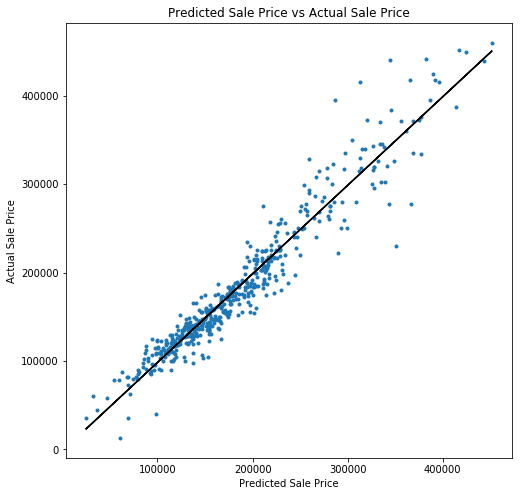

In [110]:
#plt.scatter(x=lasso_overfit_preds, y=y_test, c='r')
plt.figure(figsize=(8,8))
m,b = np.polyfit(x=lasso_preds, y=y_test, deg=1)
plt.plot(lasso_preds, y_test, '.')
plt.plot(lasso_preds, b + m * lasso_preds, '-', color='k')
frame1 = plt.gca()
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_yaxis().set_ticks([])
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.title('Predicted Sale Price vs Actual Sale Price')
plt.savefig('./images/model_preds_vs_act.png')

In [86]:
# A bit of exploration
coef_dict = {}
for coef, feat in zip(lasso.coef_, features):
    coef_dict[feat] = coef
coef_dict['Fireplaces']